<a href="https://colab.research.google.com/github/PRATIK-PHALE/bootstrap/blob/main/ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Restaurant Clustering and Sentiment Analysis**   



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 - Devansh Kumar**
##### **Team Member 2 - Pratik Phale**


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **GitHub Link -**

# **Problem Statement**



The project centers around understanding the dynamics between customers and the company, delving into the sentiments expressed in customer reviews and drawing actionable insights through visualizations. By clustering Zomato restaurants into distinct segments, we aim to provide clarity in restaurant choices for customers while offering strategic directions for the company's growth and areas of improvement.

Visualizations play a pivotal role in simplifying data analysis, allowing for instantaneous comprehension. Through sentiment analysis of customer reviews, we can derive meaningful conclusions and address business cases, facilitating informed decision-making for both customers seeking the best dining experiences and the company's strategic advancements.

Moreover, leveraging rich data on cuisine varieties and pricing enables us to conduct cost-benefit analyses, aiding in identifying optimal strategies for business expansion.

This comprehensive approach not only facilitates restaurant clustering but also empowers us to identify industry influencers and critics through the metadata of reviewers, enriching our understanding of market dynamics and customer preferences.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Zomato Restaurant names and Metadata**

In [3]:
# Importing datasets.
# Zomato Restaurant names and Metadata
meta_df_main=pd.read_csv("/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv")
# Creating the copy of dataset.
meta_df = meta_df_main.copy()

### Dataset First View

In [4]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
meta_df.shape

(105, 6)

### Dataset Information

In [6]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
meta_df.duplicated().sum()

0

In [8]:
# Creating the copy of dataset.
meta_df = meta_df_main.copy()

In [9]:
# Checking duplicate restaurant name.

meta_df['Name'].duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [11]:
# Visualizing the missing values
meta_df[meta_df['Collections'].isnull()].head()

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


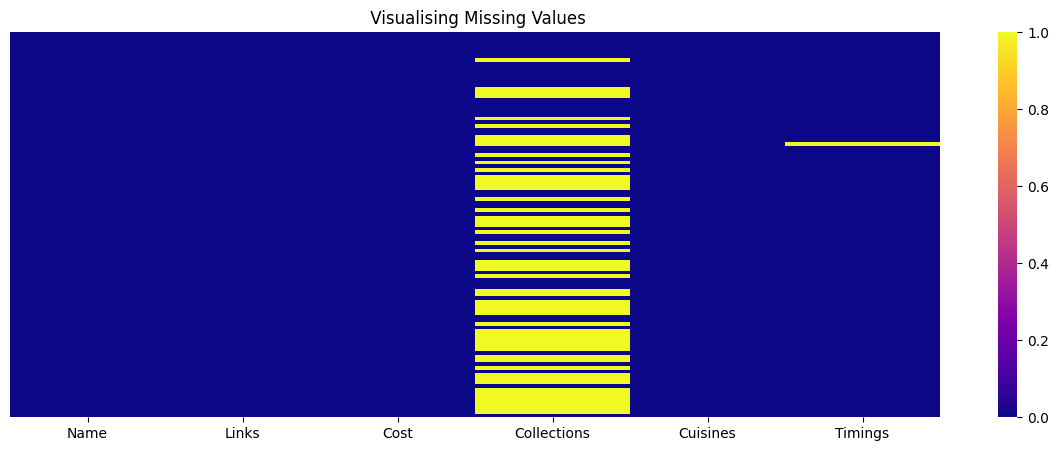

In [12]:
# Visualizing the missing values.

plt.figure(figsize=(15,5))
sns.heatmap(meta_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

Our data has missing values in collection column. Since the column contains sentiments hence no need to impute the null values.


1.   There are 105 total observation with 6 different features.
2.   Feature like collection and timing has null values.
1.   There is no duplicate values i.e., 105 unique data.
2.   Feature cost represent amount but has object data type because these values are separated by comma ','.
1.   Timing represent operational hour but as it is represented in the form of text has object data type.








## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [14]:
# Dataset Describe
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### Variables Description

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
column_list = meta_df.columns.tolist()
for column_name in column_list:
    print(meta_df[column_name].nunique())


105
105
29
42
92
77


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.

meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

### What all manipulations have you done and insights you found?

Converted the 'Cost' column, deleting the comma and changing the data type into 'int64'

In [17]:
# Dataset Info.

meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [18]:
# Chart - 1 visualization code
top10_res_by_cost = meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)
top10_res_by_cost

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800
35,Feast - Sheraton Hyderabad Hotel,2500
0,10 Downing Street,1900
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
20,Cascade - Radisson Hyderabad Hitec City,1800
102,Zega - Sheraton Hyderabad Hotel,1750
74,Republic Of Noodles - Lemon Tree Hotel,1700
60,Mazzo - Marriott Executive Apartments,1700
14,Barbeque Nation,1600
9,Arena Eleven,1600


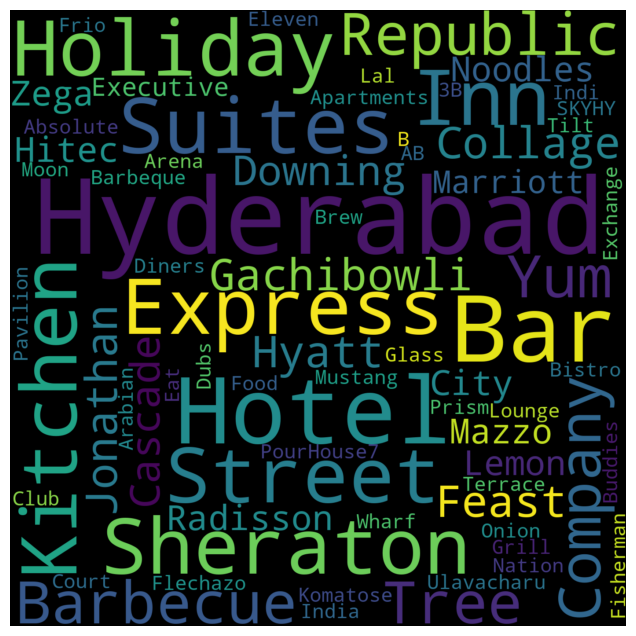

In [19]:
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

#### Chart - 2

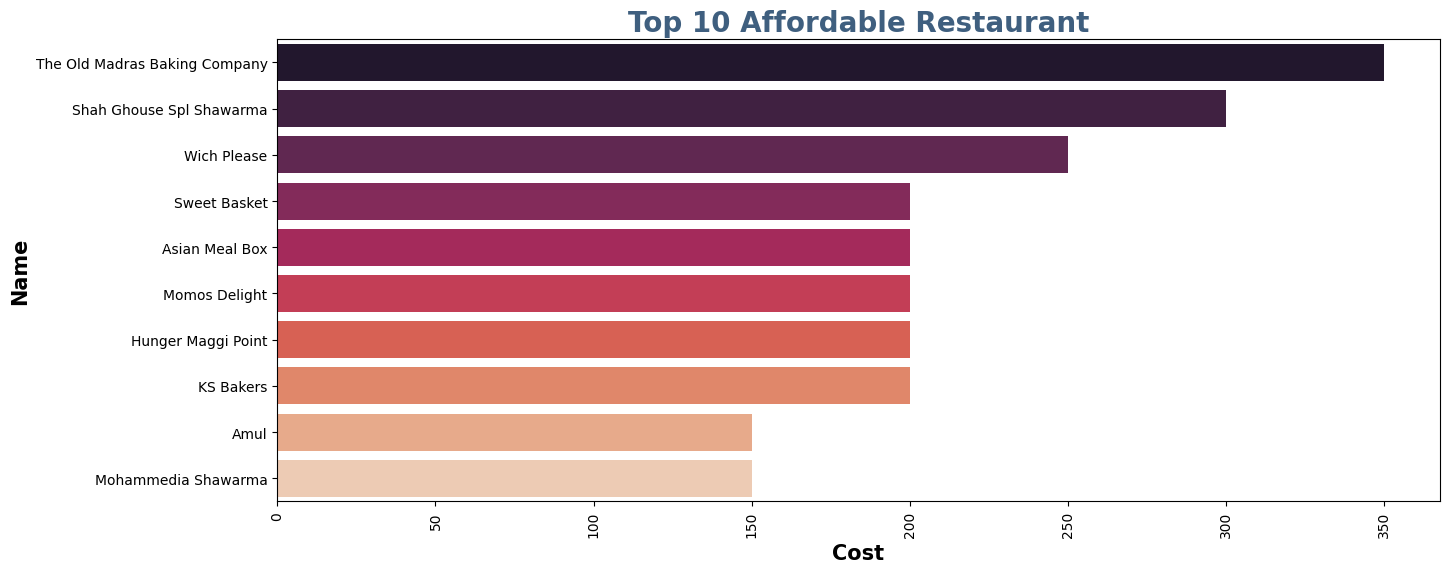

In [20]:
# Chart - 2 visualization code
# Affordable price restaurants.

plt.figure(figsize=(15,6))

# Performing groupby To get values accourding to Names and sort it for visualisation.
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)

# Lables for X and Y axis
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']

# Assigning the arguments for chart
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()

The plot shows the top 10 affordable restaurants based on their total cost. The y-axis represents the restaurant names, while the x-axis shows the total cost. The affordable restaurants are sorted in ascending order of their cost.

#### Chart - 3

<Axes: ylabel='Collections'>

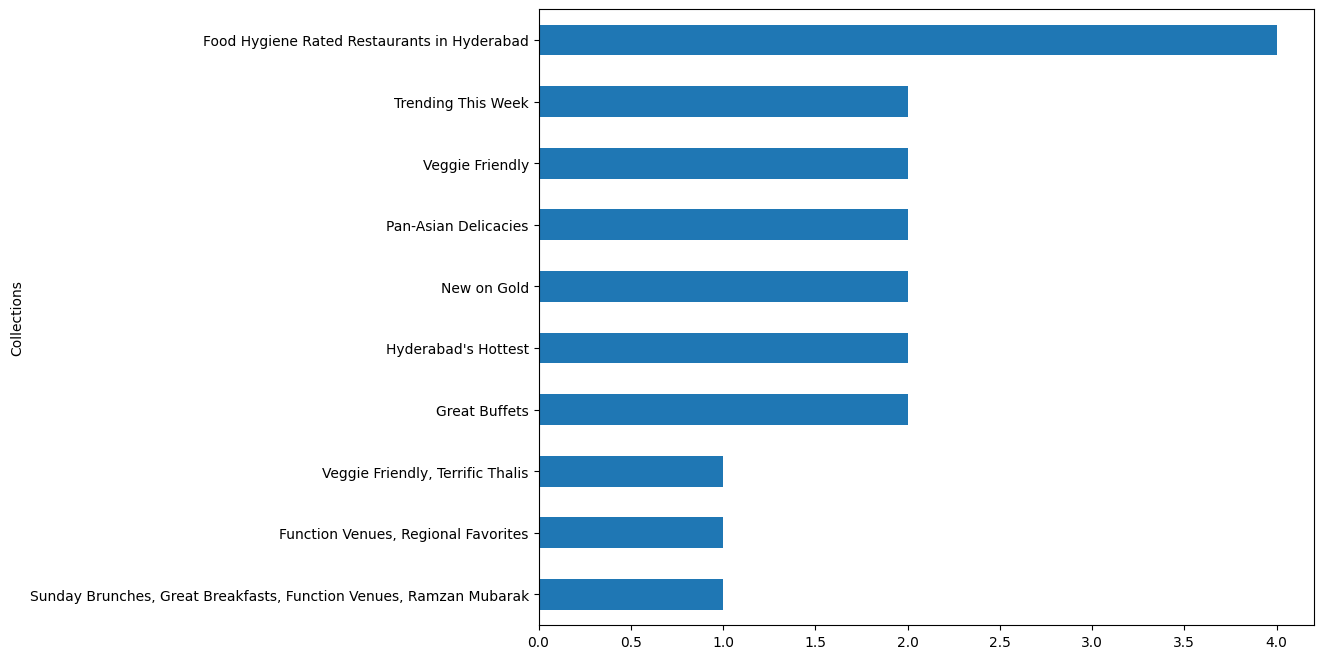

In [21]:
# Chart - 3 visualization code
# Visualisation the value counts of collection.
meta_df['Collections'].value_counts()[0:10].sort_values().plot(figsize=(10,8),kind='barh')

The resulting bar chart shows the top 10 most frequent values in the Collections column on the y-axis and their corresponding counts on the x-axis. The horizontal orientation of the bars makes it easy to compare the counts of the different collections. The longer the bar, the higher the count.

# Text preprocessing for the meta dataset.

In Order to plot the cuisines from the data we have to count the frequency of the words from the document.(Frequency of cuisine). For that We have to perform the opration like removing stop words, Convert all the text into lower case, removing punctuations, removing repeated charactors, removing Numbers and emojies and finally count vectorizer.

In [22]:
# Downloading and importing the dependancies for text cleaning.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Extracting the stopwords from nltk library for English corpus.
sw = stopwords.words('english')

In [24]:
# Creating a function for removing stopwords.
def stopwords(text):
    '''a function for removing the stopword'''

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]

    # joining the list of words with space separator
    return " ".join(text)

In [25]:
# Removing stopwords from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

Stop words are removed successfully


In [26]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    return text.translate(translator)

In [27]:
# Removing punctuation from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Punctuations present in the text are removed successfully



In [28]:
# Cleaning and removing Numbers.
import re

# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [29]:
# Removing repeating characters from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Removed repeated characters successfully



In [30]:
# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [31]:
# Implementing the cleaning.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()


0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

We dont want numbers in the text Hence removed number successfully



In [32]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter
text = ' '.join(meta_df['Cuisines'])

# separating each word from the sentences
words = text.split()

# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [33]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])

# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc[:20]
two_words_20c

,Cuisine Words,Frequency
6,north indian,61
9,indian chinese,27
42,fast food,15
4,south indian,9
5,indian north,9
33,chinese north,8
24,indian continental,6
65,italian north,6
8,biryani north,6
28,food north,6


#### Chart - 4

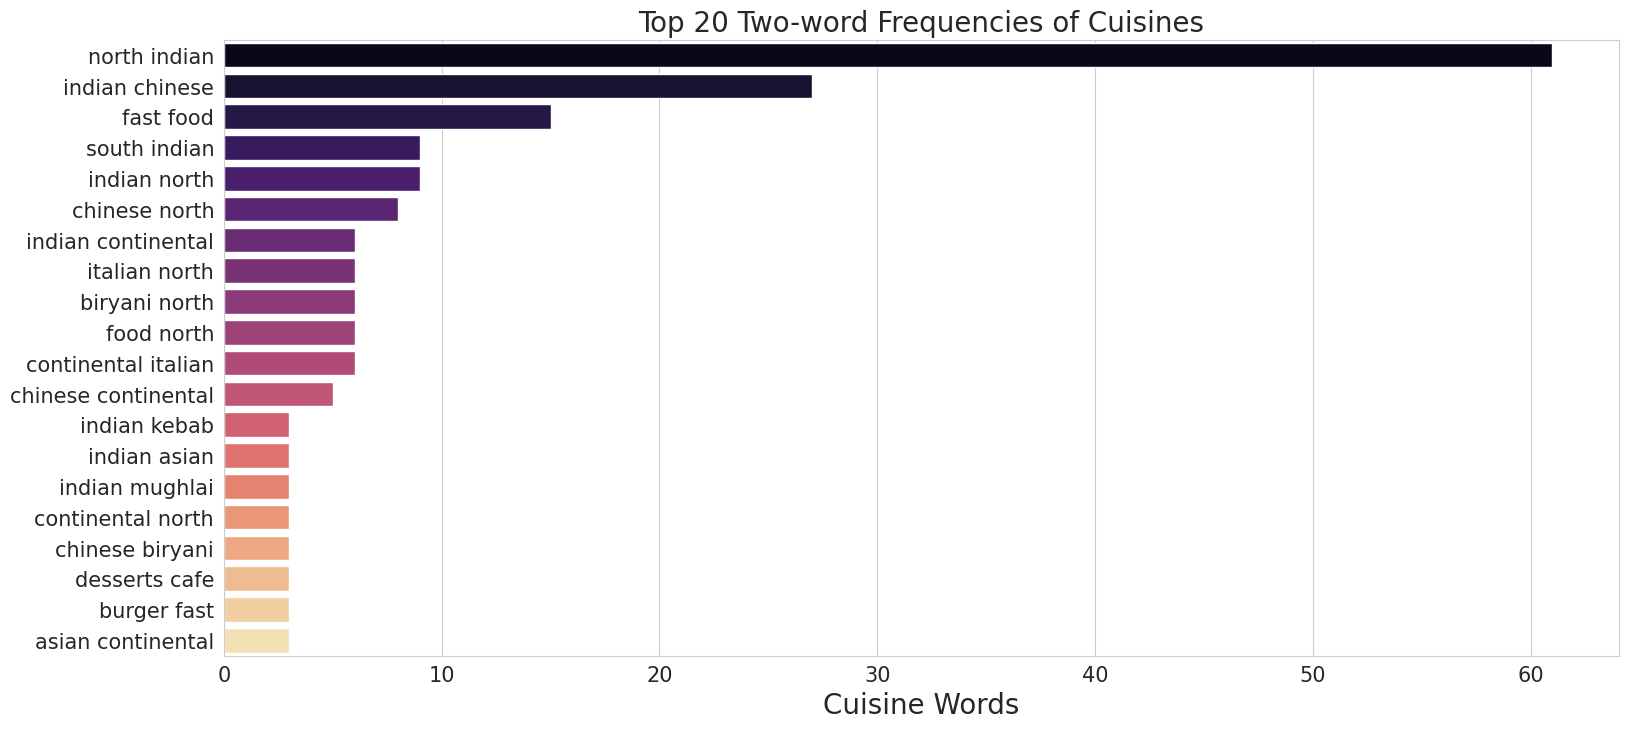

In [34]:
# Chart - 4 visualization code
# Visualizing the frequency of the Cuisines.

sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "magma")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

The DataFrame contains two columns: "Cuisine Words" and "Frequency." The "Cuisine Words" column lists the most frequent two-word cuisine terms, while the "Frequency" column shows the number of times each two-word cuisine term appears in the dataset.This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers.

# **Zomato Restaurant reviews**

In [35]:
# Loading the review dataset.
review_df=pd.read_csv("/content/drive/MyDrive/Zomato Restaurant reviews.csv")

### Dataset First View

In [36]:
# First look of dataset.

review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


###Dataset Information


In [37]:
# Info about review dataset.

review_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


###Duplicate Values


In [38]:
# Dataset Duplicate Value Count.
review_df.duplicated().sum()

36

###Missing Values/Null Values


In [39]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

As we can see, there are few missing values, so I decide to drop them all because there isn't a big loss
This notebook will use bokeh and plotly to see ratings, reviews and cost relationships , will use NLTK,gensim, to convert text to vectors to find relationships between text. We will also see wordclouds.

In [40]:
# proportion or percentage of occurrences for each unique value in the Rating column.
review_df['Rating'].value_counts(normalize=True)

Rating
5       0.384662
4       0.238205
1       0.174162
3       0.119755
2       0.068661
4.5     0.006926
3.5     0.004718
2.5     0.001907
1.5     0.000903
Like    0.000100
Name: proportion, dtype: float64

In [41]:
# Removing like value and taking the mean in the rating column.
review_df.loc[review_df['Rating'] == 'Like'] = np.nan

 # Chenging the data type of rating column
review_df['Rating']= review_df['Rating'].astype('float64')

print(review_df['Rating'].mean())

3.601044071880333


In [42]:
# Filling mean in place of null value
review_df['Rating'].fillna(3.6, inplace=True)

In [43]:
# Changing the data type of review column.
review_df['Review'] = review_df['Review'].astype(str)

# Creating a review_length column to check the frequency of each rating.
review_df['Review_length'] = review_df['Review'].apply(len)

In [44]:
review_df['Rating'].value_counts(normalize=True)

Rating
5.0    0.3832
4.0    0.2373
1.0    0.1735
3.0    0.1193
2.0    0.0684
4.5    0.0069
3.5    0.0047
3.6    0.0039
2.5    0.0019
1.5    0.0009
Name: proportion, dtype: float64

The Ratings distribution 38% reviews are 5 rated,23% are 4 rated stating that people do rate good food high.

#### Chart - 5

In [45]:
# Chart - 5 visualization code
# Visualizing the rating column against the review length.
# Polting the frequency of the rating on scatter bar plot

import plotly.express as px
fig = px.scatter(review_df, x=review_df['Rating'], y=review_df['Review_length'])
fig.update_layout(title_text="Rating vs Review Length")
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.show()

The scatter plot confirms that length of review doesnt impact ratings

#### Chart - 6

In [46]:
# Chart - 6 visualization code
# Creating polarity variable to see sentiments in reviews.(using textblob)
from textblob import TextBlob
review_df['Polarity'] = review_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: ylabel='Frequency'>

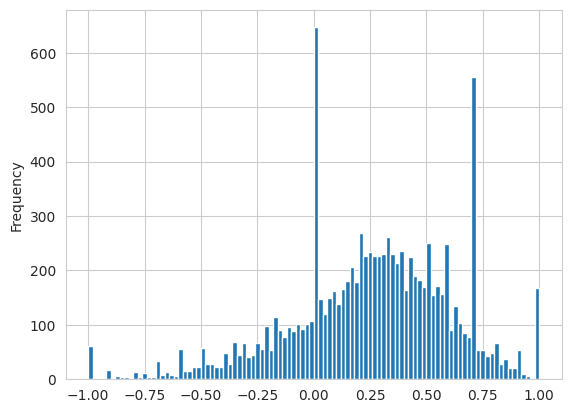

In [47]:
# Visualizing the polarity using histogram.
review_df['Polarity'].plot(kind='hist', bins=100)

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

###Removing Stop words

Stop words are used in a language to removed from text data during natural language processing. This helps to reduce the dimensionality of the feature space and focus on the more important words in the text.

In [48]:
# Importing dependancies and removing stopwords.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Creating argument for stop words.
stop_words = stopwords.words('english')

print(stop_words)
rest_word=['order','restaurant','taste','ordered','good','food','table','place','one','also']
rest_word

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['order',
 'restaurant',
 'taste',
 'ordered',
 'good',
 'food',
 'table',
 'place',
 'one',
 'also']

#### Chart - 7

In [49]:
# Chart - 7 visualization code
# We will extrapolate the 15 profiles that have made more reviews.

# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

 # Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)

# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]


Text(0, 0.5, 'N of reviews')

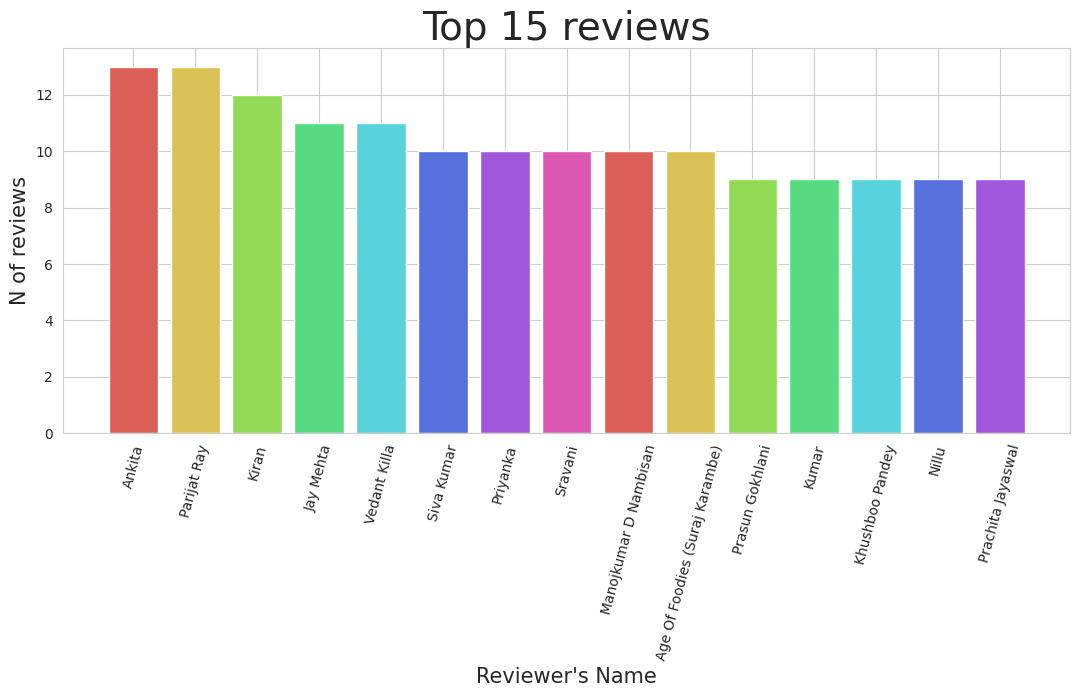

In [50]:
# Visualizing the top 15 reviewers.
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel("Reviewer's Name",size=15)
plt.ylabel('N of reviews',size=15)

#### Chart - 8

In [51]:
# Chart - 8 visualization code
# Calculate the average of their ratings review.
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]

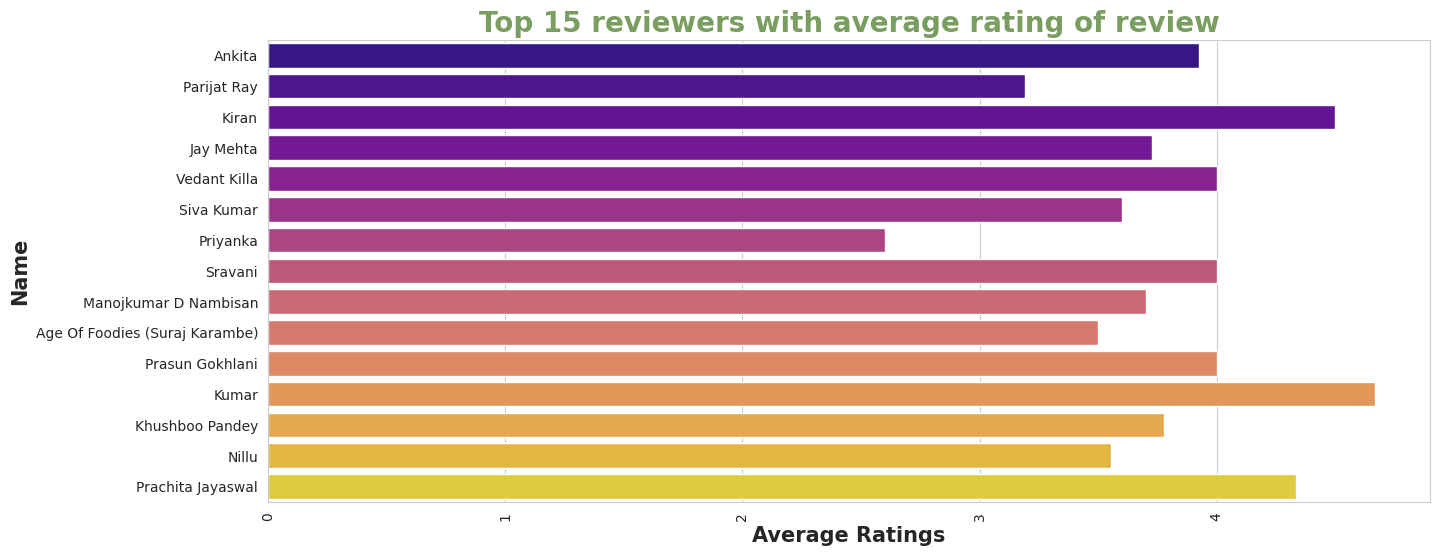

In [52]:
# Average rating of top reviewers.
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['Average_Ratings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=90)[-5])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Ratings",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

The output of top 15 reviewers based on the number of reviews they have made in a given dataset. Analyzing the reviews made by these top reviewers can help in improving customer satisfaction and loyalty, ultimately leading to increased revenue and growth.

#### Chart - 9

In [53]:
# Chart - 9 visualization code
# Removing Special characters and punctuation from review columns.

import re
review_df['Review']=review_df['Review'].map(lambda x: re.sub('[,\.!?]','', x))
review_df['Review']=review_df['Review'].map(lambda x: x.lower())
review_df['Review']=review_df['Review'].map(lambda x: x.split())
review_df['Review']=review_df['Review'].apply(lambda x: [item for item in x if item not in stop_words])
review_df['Review']=review_df['Review'].apply(lambda x: [item for item in x if item not in rest_word])

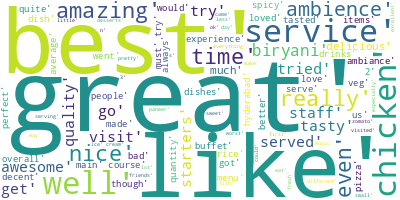

In [54]:

# Word cloud for positive reviews.

from wordcloud import WordCloud
review_df['Review']=review_df['Review'].astype(str)

ps = PorterStemmer()
review_df['Review']=review_df['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(review_df['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Service, taste, time, starters are key to good review.

#### Chart - 10

In [55]:
# Chart - 10 visualization code
# Creating two datasets for positive and negative reviews.

review_df['Rating']= pd.to_numeric(review_df['Rating'],errors='coerce')   # The to_numeric() function in pandas is used to convert a pandas object to a numeric type.
pos_rev = review_df[review_df.Rating>= 3]
neg_rev = review_df[review_df.Rating< 3]

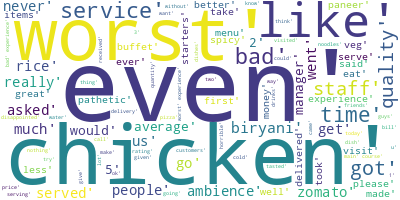

In [56]:
# Negative reviews wordcloud.

long_string = ','.join(list(neg_rev['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Service , bad chicken , staff behavior, stale food are key reasons for neagtive reviews

## ***5. TEXT CLEANING***

In [57]:
# Creating word embeddings and t-SNE plot. (for positive and negative reviews).

from gensim.models import word2vec
pos_rev = review_df[review_df.Rating>= 3]
neg_rev = review_df[review_df.Rating< 3]

Dataframe where the Rating column is greater than or equal to 3. This selects all the positive reviews where as the Rating column is less than 3. This selects all the negative reviews, assuming that the Rating column is a scale from 1 to 5 with 5 being the highest rating.

### **Create a corpus of words from the negative reviews in the neg_rev DataFrame.**

In [58]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col]:
            word_list = sentence.split(" ")
            corpus.append(word_list)
    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(neg_rev)
corpus[0:2]


[["['corn',",
  "'cheese',",
  "'balls',",
  "'manchow',",
  "'soup',",
  "'paneer',",
  "'shashlik',",
  "'sizzler',",
  "'sizzler',",
  "'stale',",
  "'paneer',",
  "'smelling',",
  "'waiter',",
  "'impolite',",
  "'even',",
  "'accept',",
  "'mistake',",
  "'never',",
  "'going']"],
 ["['went',",
  "'team',",
  "'lunch',",
  "'worst',",
  "'tasteless',",
  "'service',",
  "'slow',",
  "'ac',",
  "'working',",
  "'we’ve',",
  "'requested',",
  "'multiple',",
  "'times',",
  "'use',",
  "'please',",
  "'don’t',",
  "'waste',",
  "'money',",
  "'strictly',",
  "'recommend',",
  "'prefer',",
  "'beyond',",
  "'flavours']"]]

### **Create a corpus of words from the positive reviews in the neg_rev DataFrame.**

In [59]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:  # If 'Review' is the column name where reviews are stored, it's fine.
        for sentence in data[col]:  # Removed .iteritems()
            word_list = sentence.split(" ")  # Updated to get the sentence directly from data[col]
            corpus.append(word_list)

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(pos_rev)  # Assuming pos_rev is your positive reviews dataset
corpus[0:2]


[["['ambience',",
  "'quite',",
  "'saturday',",
  "'lunch',",
  "'cost',",
  "'effective',",
  "'sate',",
  "'brunch',",
  "'chill',",
  "'friends',",
  "'parents',",
  "'waiter',",
  "'soumen',",
  "'das',",
  "'really',",
  "'courteous',",
  "'helpful']"],
 ["['ambience',",
  "'pleasant',",
  "'evening',",
  "'service',",
  "'prompt',",
  "'experience',",
  "'soumen',",
  "'das',",
  "'-',",
  "'kudos',",
  "'service']"]]

# **LDA**

Topic Modeling using LDA

LDA is one of the methods to assign topic to texts. If observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.

In [60]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

Plotting the top 10 most occuring words. Topic modeling is a process to automatically identify topics present in a text object and to assign text corpus to one category of topic.

In [61]:
# Assume that documents is a list of strings representing text documents

# Tokenize the documents
tokenized_docs = [simple_preprocess(doc) for doc in review_df['Review']]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents to a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train an LDA model on the bag-of-words corpus
num_topics = 10  # The number of topics to extract
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top 10 terms
for topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print('Topic {}: {}'.format(topic[0], ', '.join([term[0] for term in topic[1]])))

Topic 0: mandi, like, donuts, get, regular, never, murgh, please, haleem, best
Topic 1: great, ambience, service, nice, best, visit, amazing, really, awesome, staff
Topic 2: try, ice, must, indian, cream, best, would, north, gachibowli, go
Topic 3: service, ambience, veg, buffet, menu, starters, went, items, main, course
Topic 4: paneer, butter, paratha, dal, packaging, roti, masala, curry, really, naan
Topic 5: service, us, time, experience, excellent, staff, coffee, even, visit, customer
Topic 6: cake, chocolate, cakes, brownies, chai, tea, shakes, red, cupcakes, brownie
Topic 7: chicken, rice, fried, veg, spicy, fish, biryani, well, like, burger
Topic 8: biryani, delivery, quantity, bad, worst, chicken, quality, time, less, zomato
Topic 9: momos, nice, biriyani, nan, breakfast, match, sports, bar, kurkure, happy


In [62]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.9 MB/s eta 0:00:00


In [63]:
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [64]:
lda_visualization = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary, mds='tsne')
pyLDAvis.display(lda_visualization)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The topics and topic terms can be visualised to help assess how interpretable the topic model is.

### Sentiment Analysis

In [65]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
# Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:
# Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [68]:
# Applying subjectivity and the polarity function to the respective columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



If the score is less than 0, the function returns the string 'Negative'. If the score is equal to 0, the function returns the string 'Neutral'. If the score is greater than 0, the function returns the string 'Positive'.

In [70]:
# Apply get analysis function to separate the sentiments from the column
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [71]:
# plot the polarity and subjectivity
fig = px.scatter(review_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
# Add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The resulting plot can provide several insights into the sentiment analysis results. Firstly, the histogram bars on the left side of the plot (negative polarity) indicate that a significant number of reviews expressed negative sentiments. Similarly, the histogram bars on the right side of the plot (positive polarity) indicate that a significant number of reviews expressed positive sentiments.

Overall, this plot can provide a quick and easy way to visualize the sentiment polarity distribution of the reviews, which can help in understanding the overall sentiment of the customers towards the restaurants.

# **Clustering**


In [73]:
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [74]:
# converting the cuisines to lower case

meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower());

In [75]:
# Separating the Name, cost and cuisines column.
cuisine_df = meta_df_main.loc[:,['Name','Cost','Cuisines']]


In [76]:
# Overview of separated variables.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med..."


In [77]:
# Removing spces from cuisine column.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

# Spliting the Words in cuisine.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [78]:
# Overview on text cleaning.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,"1,300","[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","[asian, continental, northindian, chinese, med..."


In [79]:
from sklearn.preprocessing import MultiLabelBinarizer

# converting a list of labels for each sample into a binary indicator matrix
mlb = MultiLabelBinarizer(sparse_output=True)

In [80]:
# converting the Cuisines column in the cuisine_df DataFrame into a binary indicator matrix.
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [81]:
# Overview
cuisine_df.head()


,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [82]:
# Checking the unique for rating.
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, 3.6])

In [83]:
# Remove nan rating in Rating column.
review_df.dropna(subset=['Rating'],inplace=True)

In [84]:
# Change data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')

In [85]:
# Dropping the null Values from review column.
review_df.dropna(subset =['Review'], inplace=True)

In [86]:
# Grouping the restaurant on the basis of average rating.
ratings_df = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [87]:
# Top highly rated 15 restaurants.
ratings_df .sort_values(by='Rating',ascending = False).head(15)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [88]:
#  Combining the information on restaurant cuisine and ratings into a single DataFrame.
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [89]:
# Overview
df_cluster.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [90]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [91]:
# Checking the data type and null counts for newly created variables.
df_cluster.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       100 non-null    Sparse[int64, 0]
 4   andhra         100 non-null    Sparse[int64, 0]
 5   arabian        100 non-null    Sparse[int64, 0]
 6   asian          100 non-null    Sparse[int64, 0]
 7   bbq            100 non-null    Sparse[int64, 0]
 8   bakery         100 non-null    Sparse[int64, 0]
 9   beverages      100 non-null    Sparse[int64, 0]
 10  biryani        100 non-null    Sparse[int64, 0]
 11  burger         100 non-null    Sparse[int64, 0]
 12  cafe           100 non-null    Sparse[int64, 0]
 13  chinese        100 non-null    Sparse[int64, 0]
 14  continental    100 non-null    Sparse[int64

In [92]:
# Removing commas from the cost variables.
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')

In [93]:
# Changing the data type of the cost column.
df_cluster['Cost']= df_cluster['Cost'].astype('float')

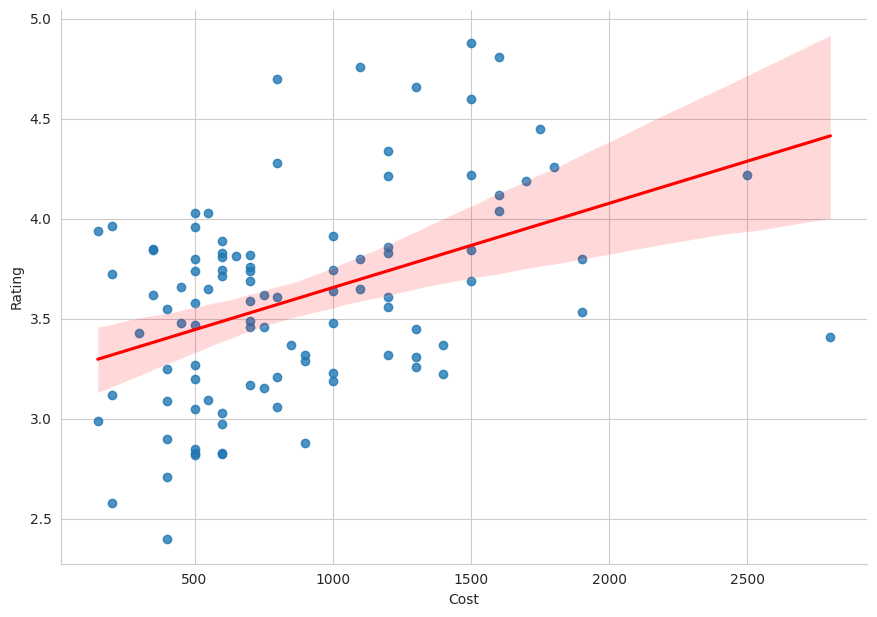

In [94]:
# Visualising relationship between the cost of a meal and the rating of a restaurant
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

The resulting plot shows the relationship between the cost of a meal and the rating of a restaurant, with the regression line indicating the general trend in the data. This can help identify any patterns or correlations between cost and rating.



# **K-means Clustering**


In [95]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

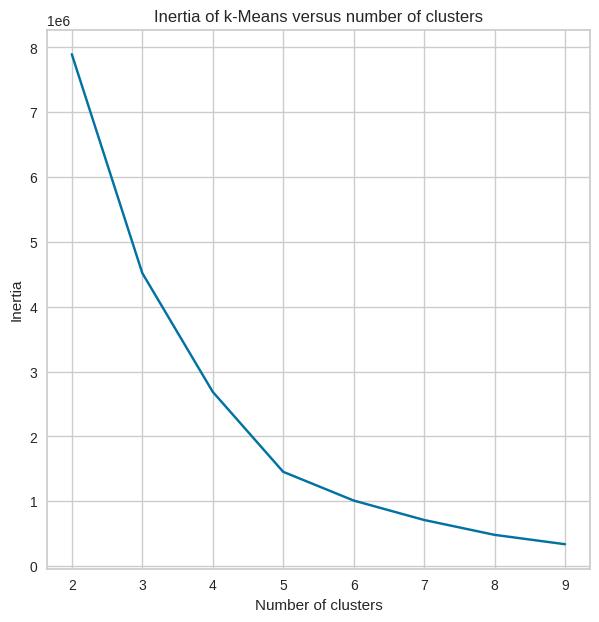

In [96]:
# Create a list of inertia scores for different numbers of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis=1)).inertia_
          for i in range(8)]

# Create a line plot of inertia scores versus number of clusters
plt.figure(figsize=(7,7))
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')
plt.show()

The plot can help to identify the optimal number of clusters based on the elbow point of the curve, where the rate of decrease in inertia score slows down significantly.

In [97]:
# Initializing a K-Means clustering model with number of clusters and random state.
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [98]:
# predict the cluster label of a new data point based on a trained clustering model.
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [99]:
df_cluster['labels'] = cluster_lbl

In [100]:
# Creating the data frame for each cluster.
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [101]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

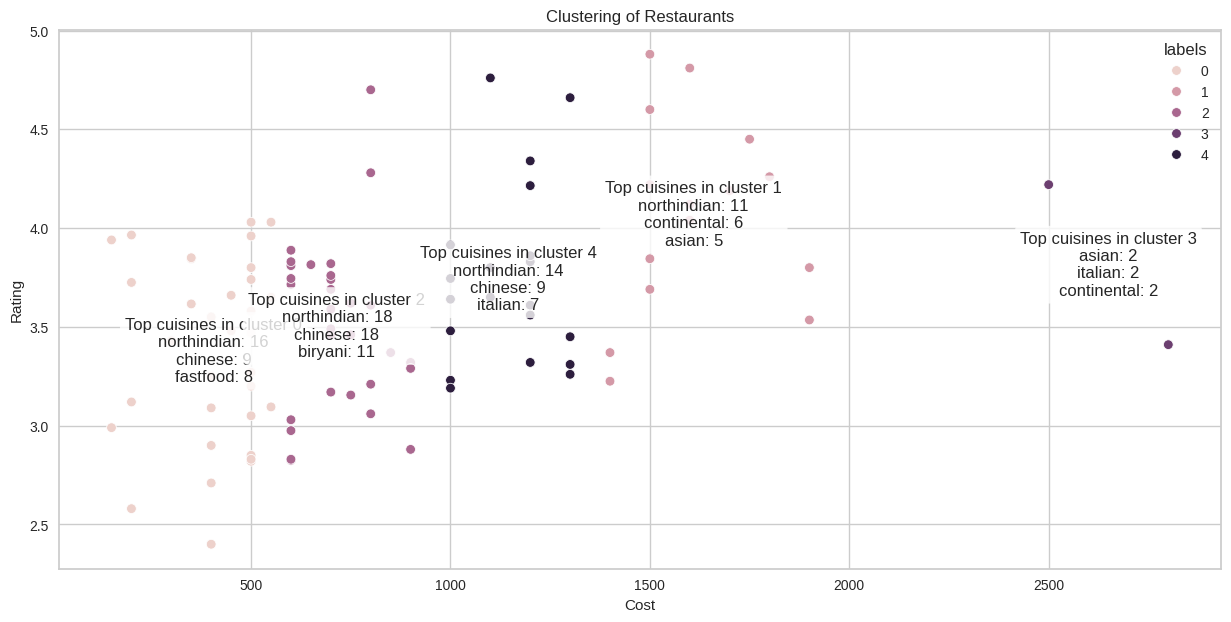

In [102]:
# Create a scatter plot of the clusters with annotations for top cuisines
plt.figure(figsize=(15,7))
sns.scatterplot(x='Cost', y='Rating', hue='labels', data=df_cluster)

# Add annotations for top cuisines in each cluster
for i, df in enumerate(list_of_cluster):
    top_cuisines = df.drop(['index', 'Name', 'Cost', 'Rating', 'labels'], axis=1).sum().sort_values(ascending=False)[:3]
    top_cuisines_str = '\n'.join([f'{cuisine}: {count}' for cuisine, count in top_cuisines.items()])
    plt.annotate(f'Top cuisines in cluster {i}\n{top_cuisines_str}',
                 xy=(df['Cost'].mean(), df['Rating'].mean()),
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clustering of Restaurants')
plt.show()

For each cluster, the top three cuisines are identified and annotated on the plot. The annotation includes the name of the cluster, its centroid location (mean cost and mean rating), and the top three cuisines and their counts within the cluster. This plot can be used to visually identify how the restaurants are grouped and the dominant features of each cluster.

# **Conclusion**

The project was successful in achieving the goals of clustering and sentiment analysis. The clustering part provided insights into the grouping of restaurants based on their features, which can help in decision making for users and businesses. The sentiment analysis part provided insights into the sentiments expressed by the users in their reviews, which can help businesses in improving their services and user experience.

There are several potential areas for future work, such as implementing more advanced clustering algorithms and sentiment analysis techniques, incorporating more features such as images and menus of the restaurants, and exploring the relationships between the clustering and sentiment analysis results.Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***